In [18]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
cd Datas

/content/drive/My Drive/algorithmtrading/pair_trading/Datas


In [ ]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin:end]

# - 과거 1분단위 데이터 받아오기

In [22]:
now = '20210128'

kodex200 = pd.read_pickle('KODEX 200TR(m)_'+now)
kodex_active = pd.read_pickle('KODEX 혁신기술테마액티브(m)_'+now)

temp =  pd.merge(left = kodex200 , right = kodex_active, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')
temp.columns = ['kodex200','volume','kodex_active','volume']
temp = temp[['kodex200','kodex_active']]

temp['kodex200']= abs(pd.to_numeric(temp['kodex200']))
temp['kodex_active']=abs(pd.to_numeric(temp['kodex_active']))
temp['kodex_active'] = temp['kodex_active']
temp['spread'] = temp['kodex200'] - temp['kodex_active']
# temp['ma60_spread'] = temp['spread'].rolling(window=60, center=False).mean()
temp['kodex200_cumret']= np.log(temp['kodex200']/temp['kodex200'][0])
temp['kodex_active_cumret']= np.log(temp['kodex_active']/temp['kodex_active'][0])

temp

,kodex200,kodex_active,spread,kodex200_cumret,kodex_active_cumret
체결시간,,,,,
20200929090000,9960,10040,-80,0.000000,0.000000
20200929090100,9960,10020,-60,0.000000,-0.001994
20200929090200,9965,10015,-50,0.000502,-0.002493
20200929090300,9950,10005,-55,-0.001005,-0.003492
20200929090400,9960,10000,-40,0.000000,-0.003992
...,...,...,...,...,...
20210128141000,13580,13440,140,0.310021,0.291658
20210128141100,13565,13440,125,0.308916,0.291658
20210128141200,13565,13440,125,0.308916,0.291658


# - 공적분 분석

In [ ]:
print(coint(temp['kodex200'][-500:],temp['kodex_active'][-500:]))

(-3.367917313337898, 0.046040924062298295, array([-3.91852234, -3.34840209, -3.05296032]))


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

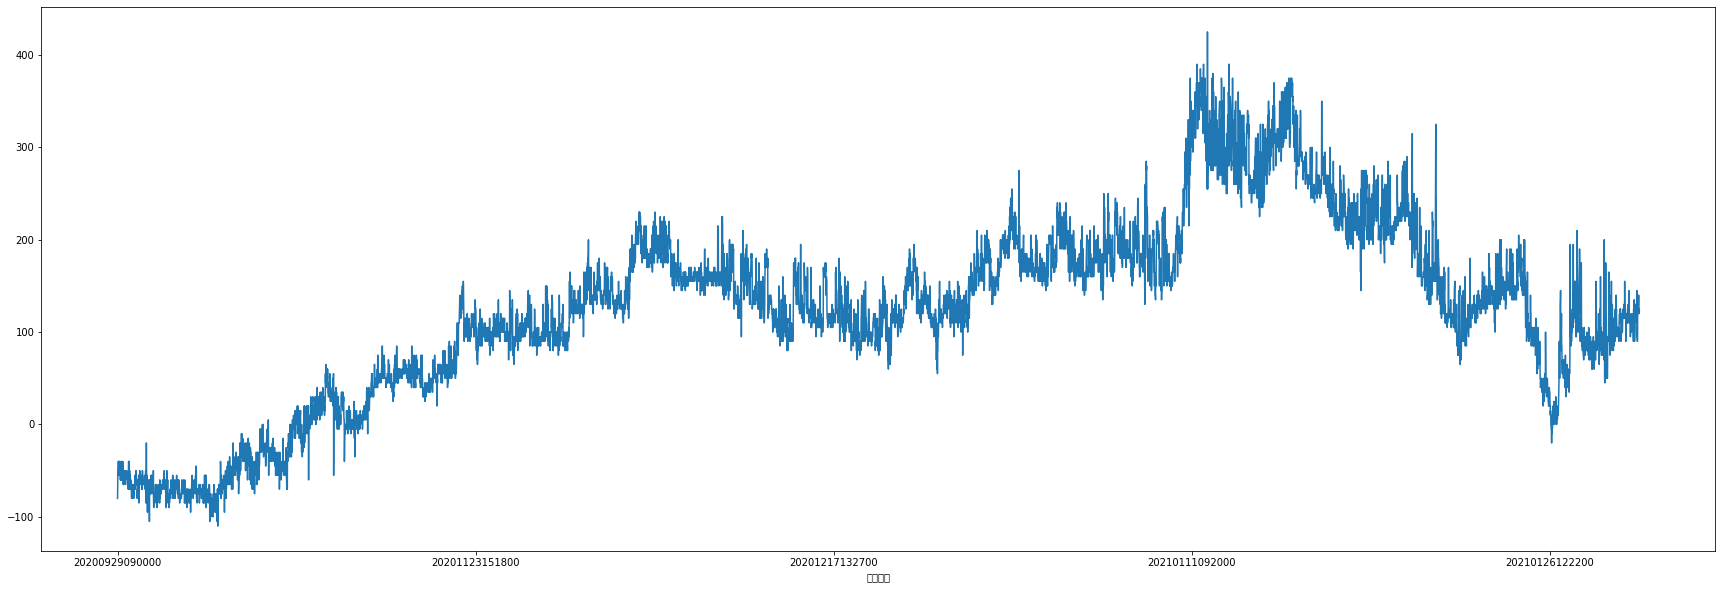

In [24]:
temp['spread'].plot()

# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [ ]:
df = {}
calender = []
for date in range(20200929,20210128):
    if 20201231< date <20210101:
        continue
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        temp['spread'] = temp['kodex200'] - temp['kodex_active']
        temp['ma60_spread'] = temp['spread'].rolling(window=60, center=False).mean()
        # temps['ma60_mean'] = temps['spread'].rolling(window=60, center=False).mean()
        # temps['ma60_std'] = temps['spread'].rolling(window=60, center=False).std()
        # temps['ma60_zscore'] = (temps['spread'] - temps['ma60_mean']) / temps['ma60_std']
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))
    except:
        pass
calender

# 그래프 그리기

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

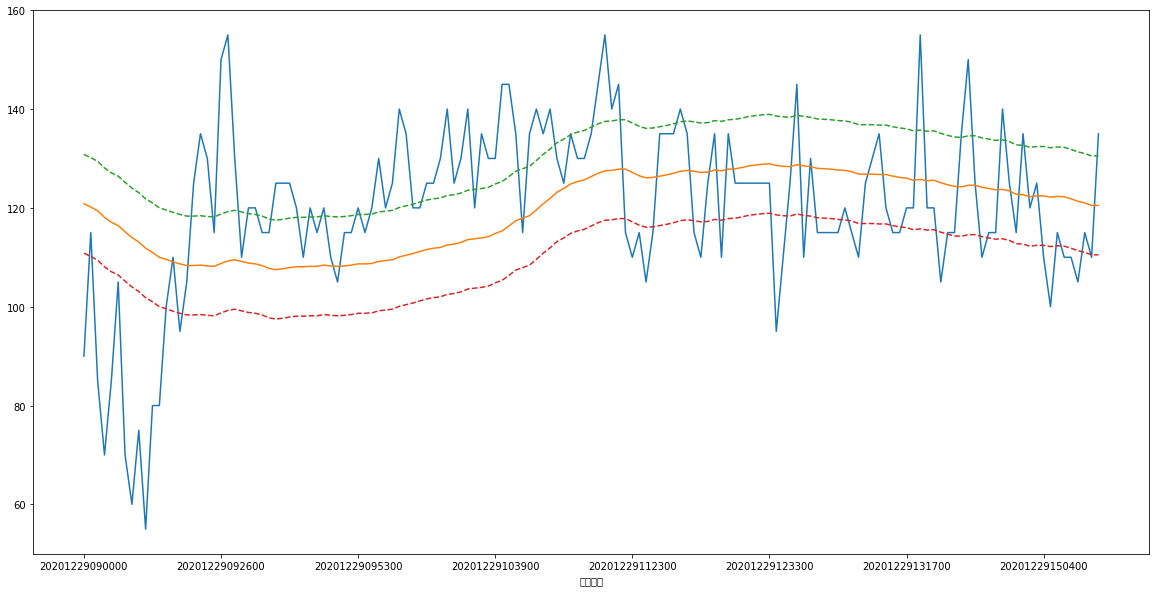

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

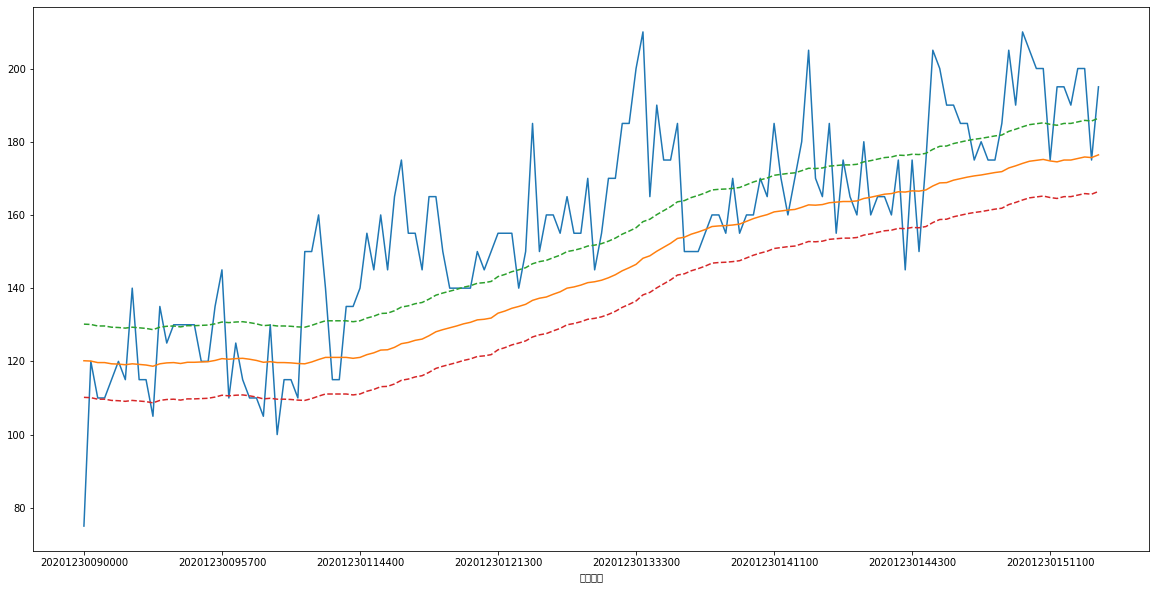

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

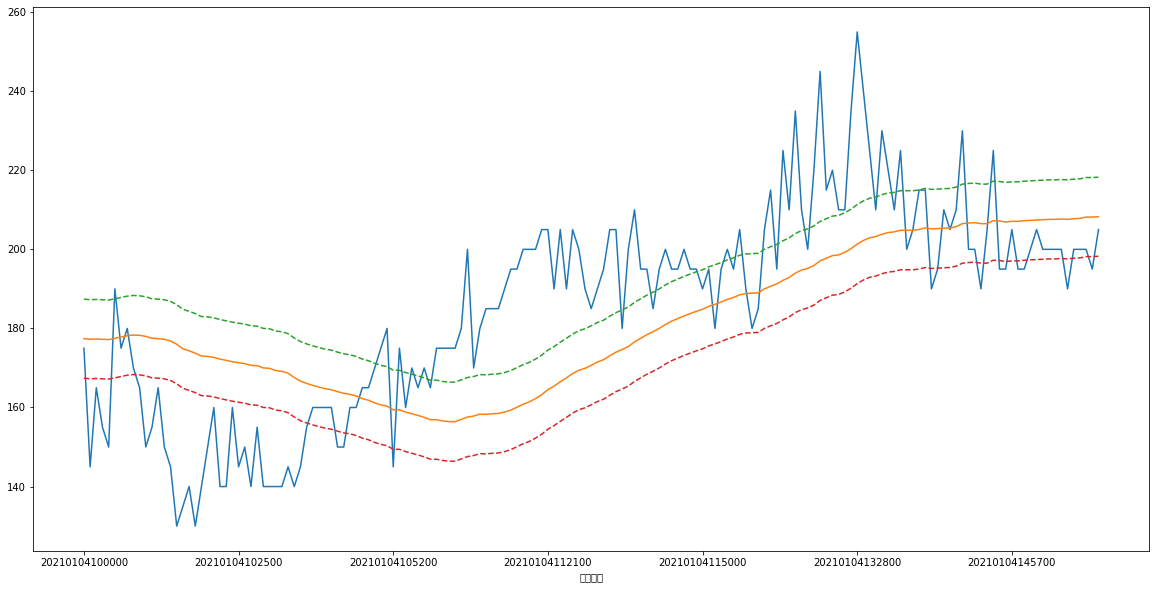

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

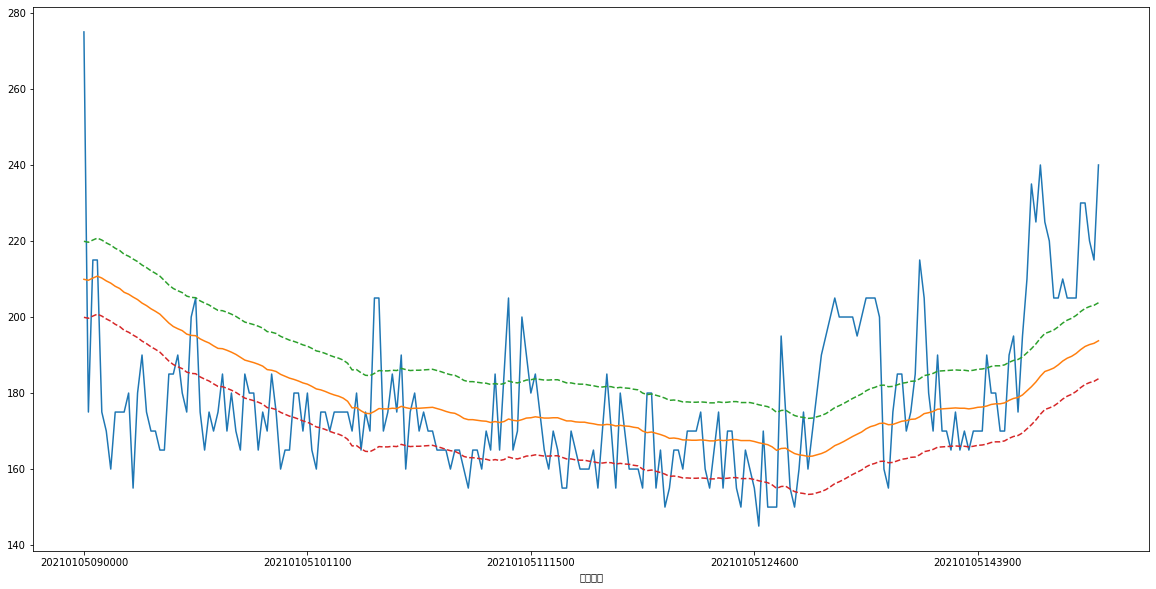

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

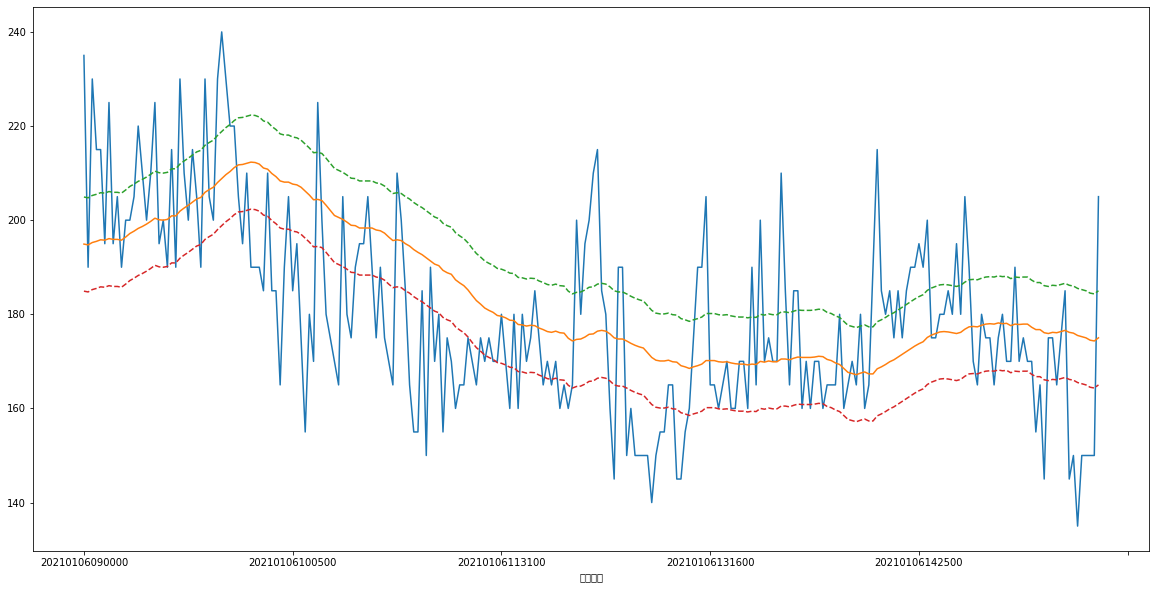

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

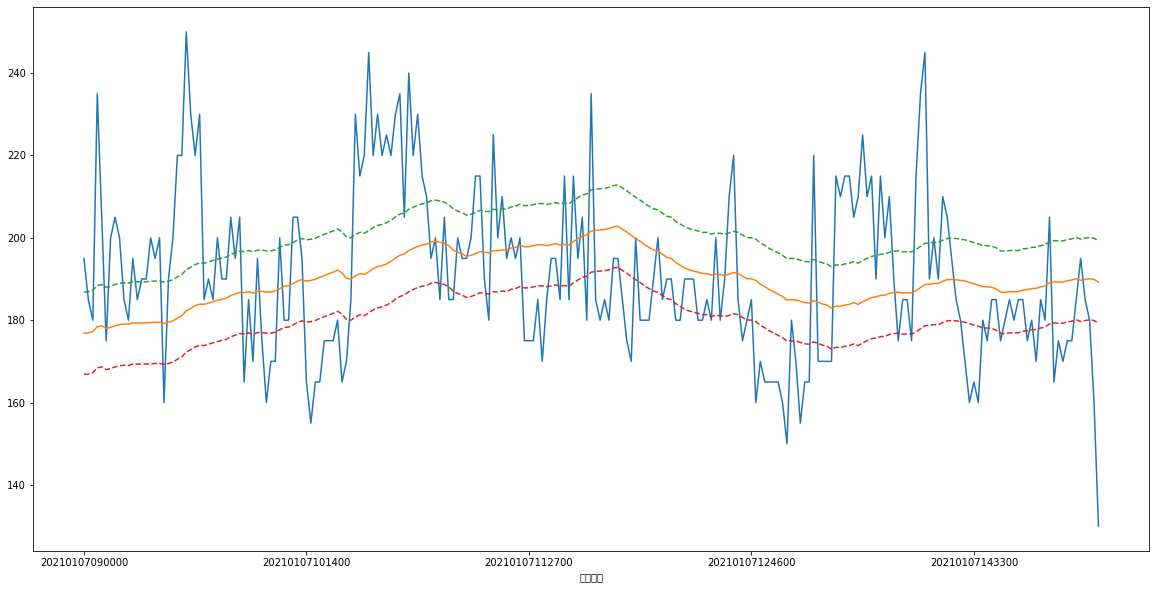

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

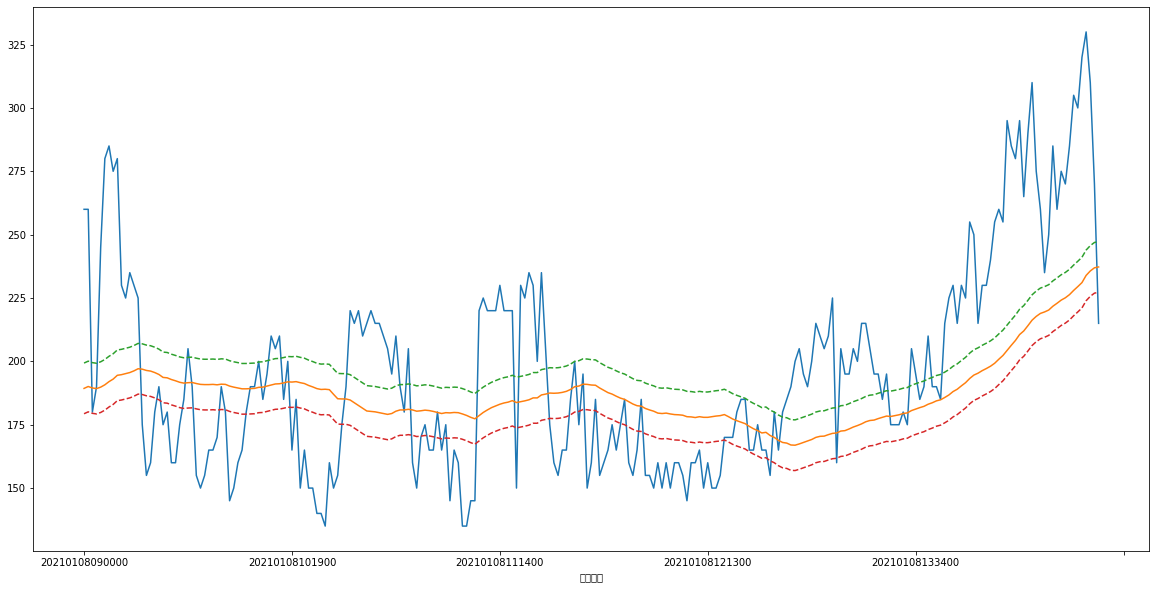

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

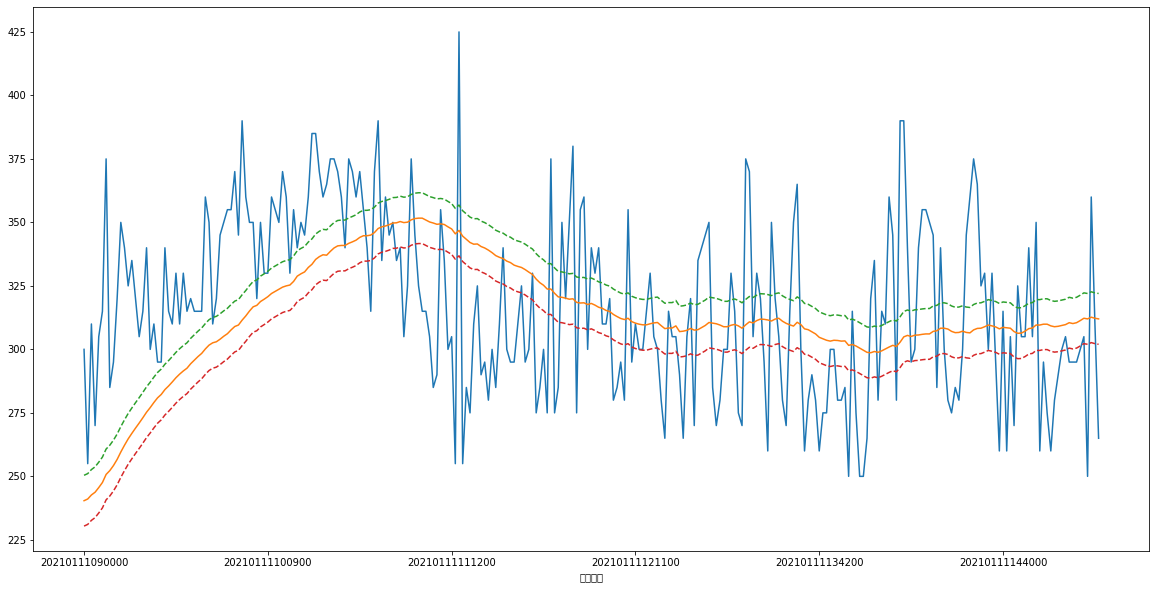

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

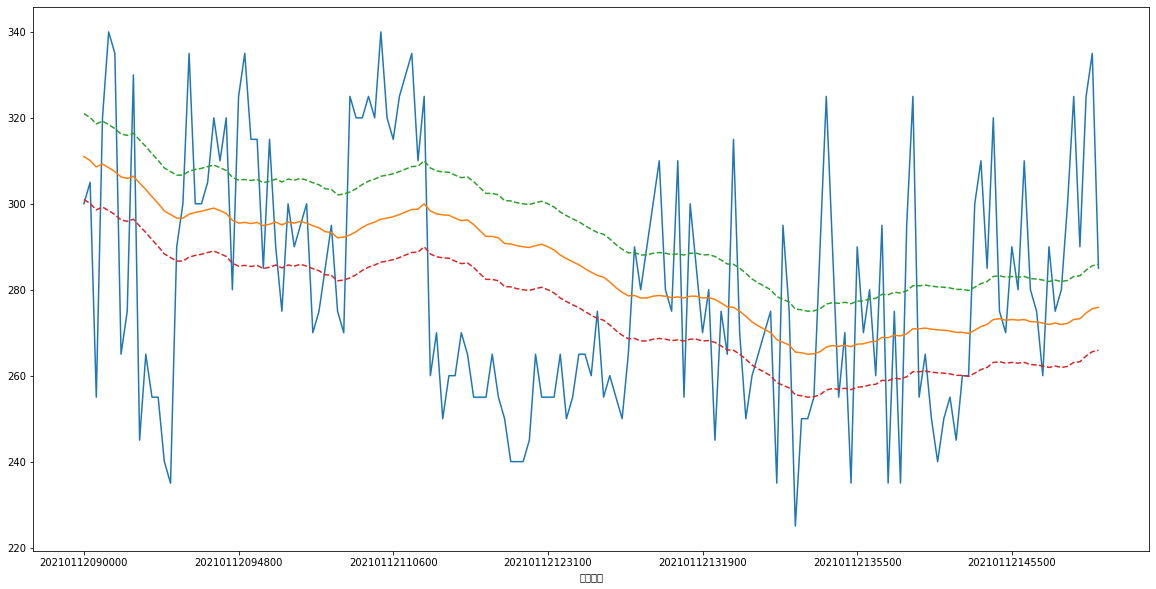

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

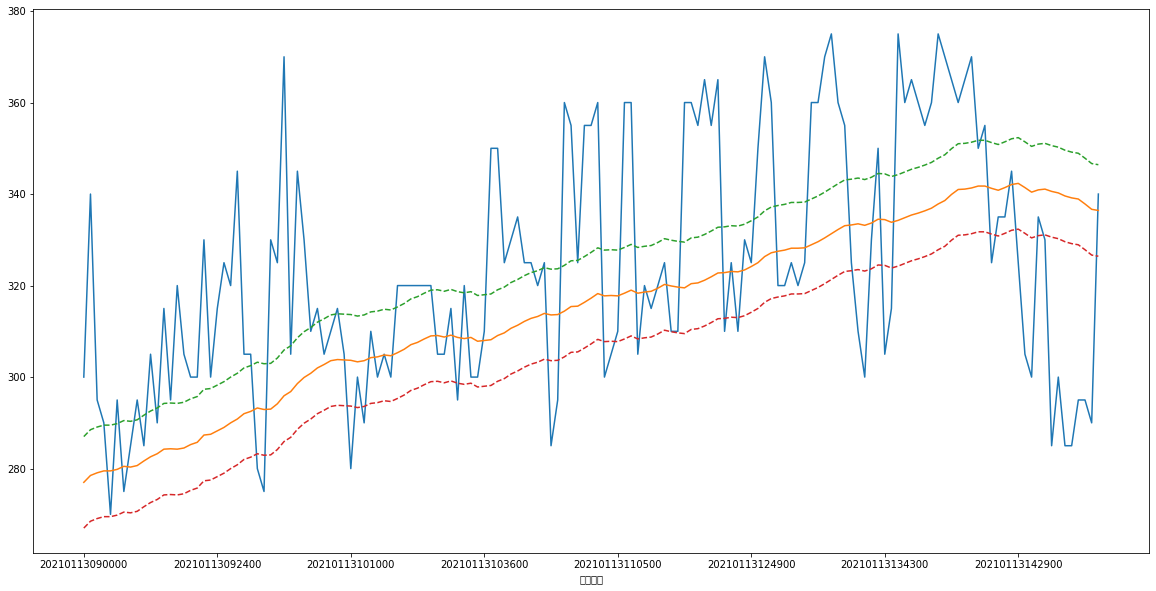

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

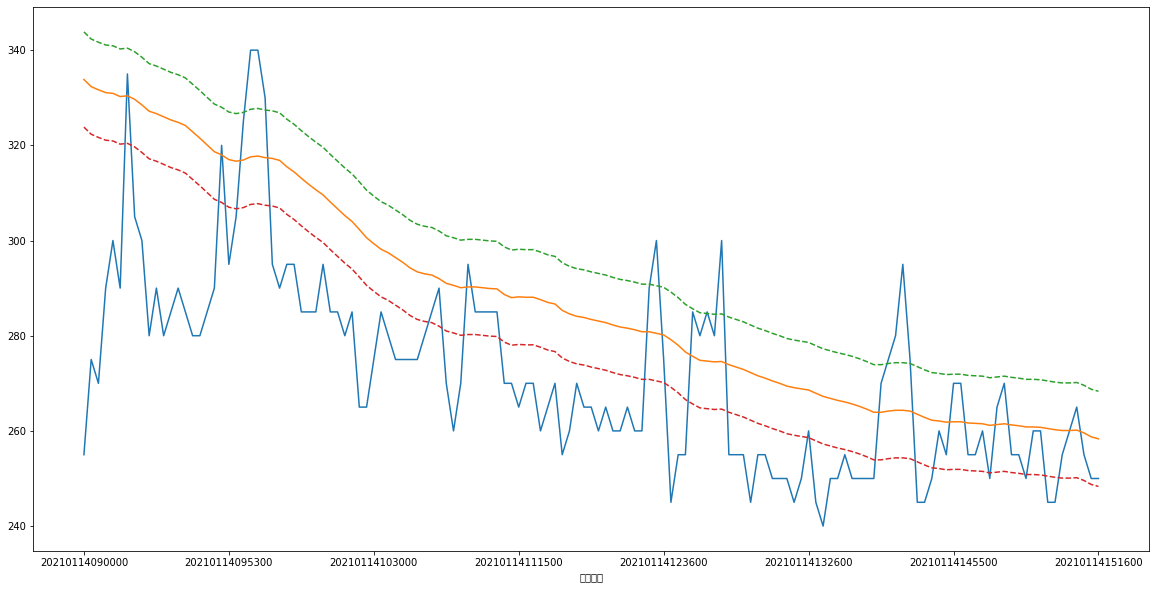

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

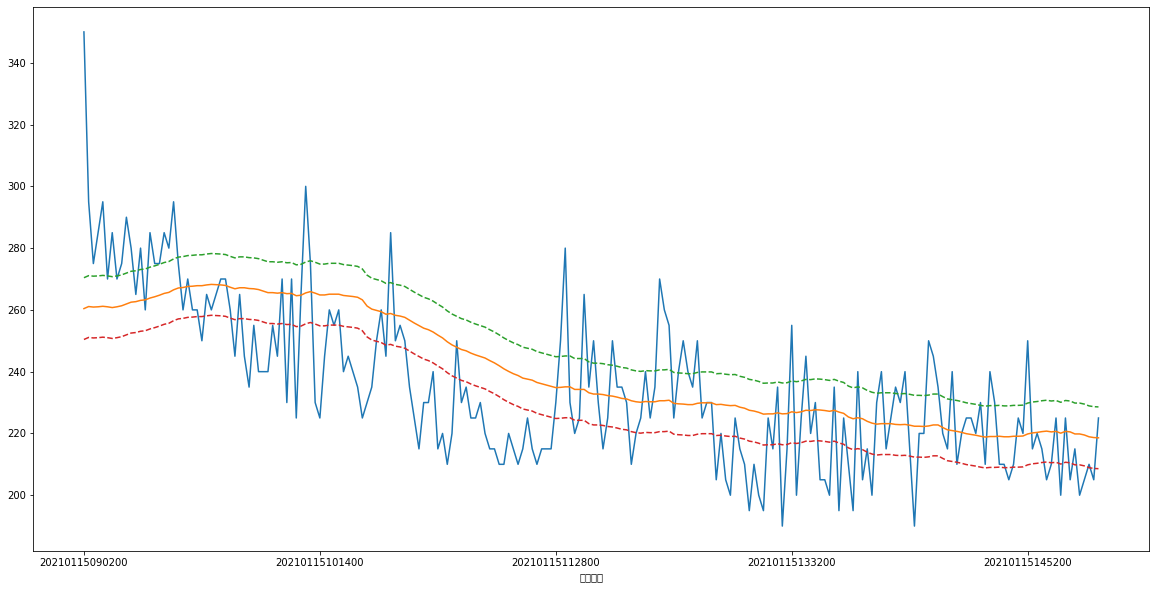

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

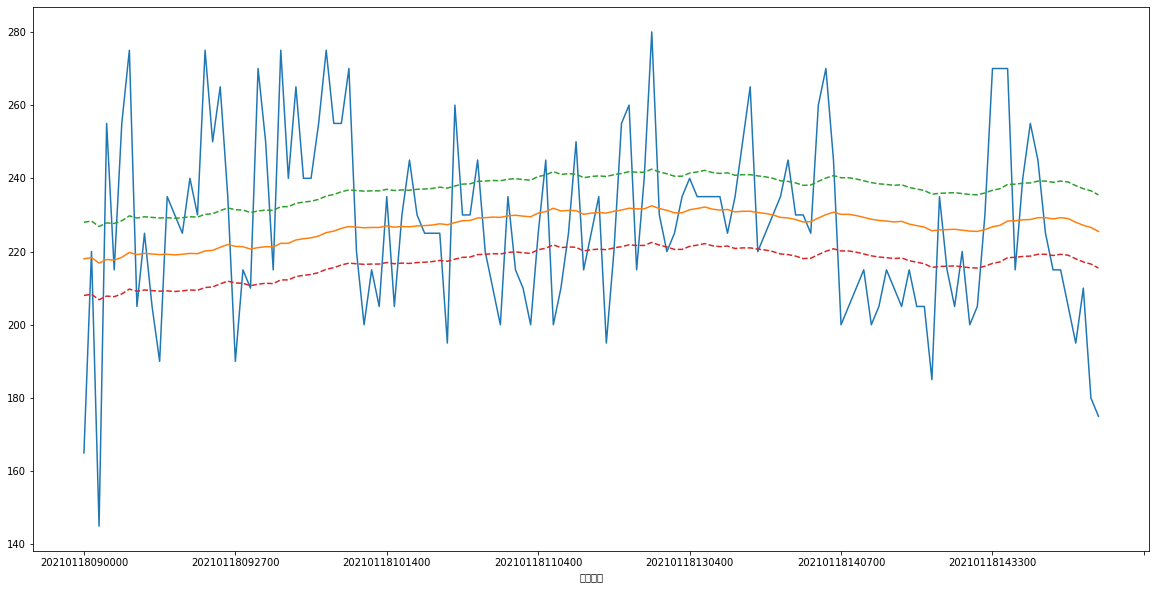

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

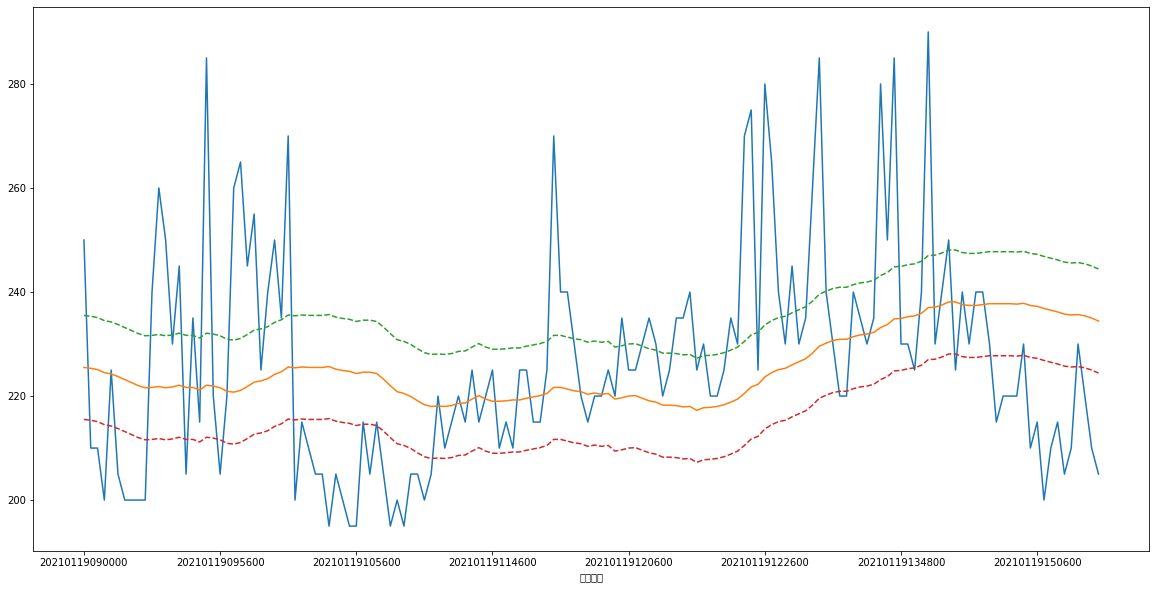

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

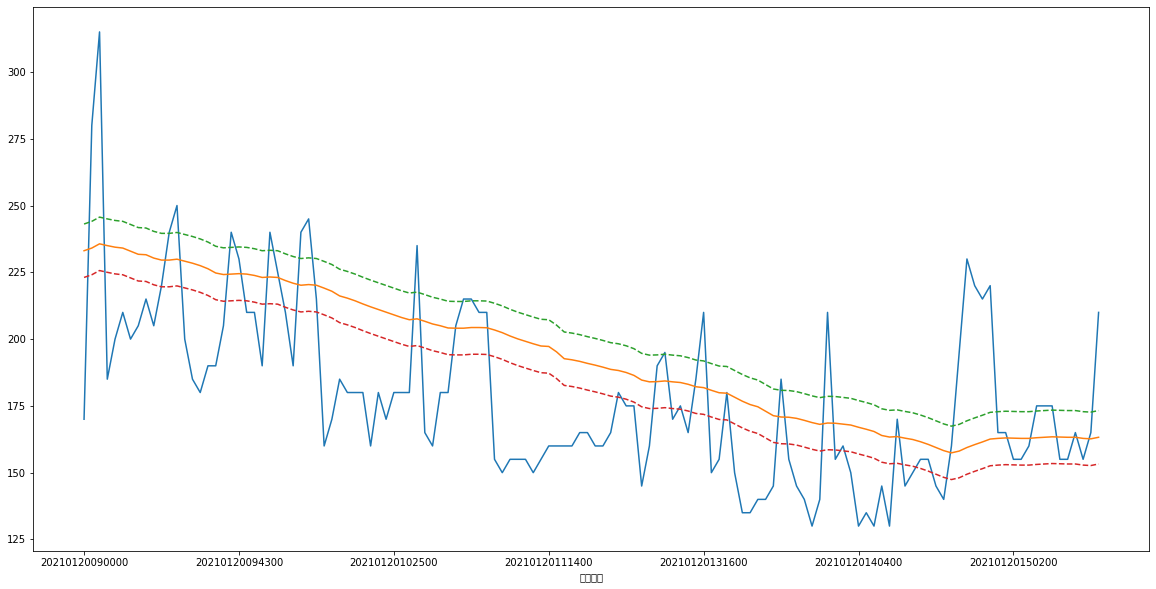

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

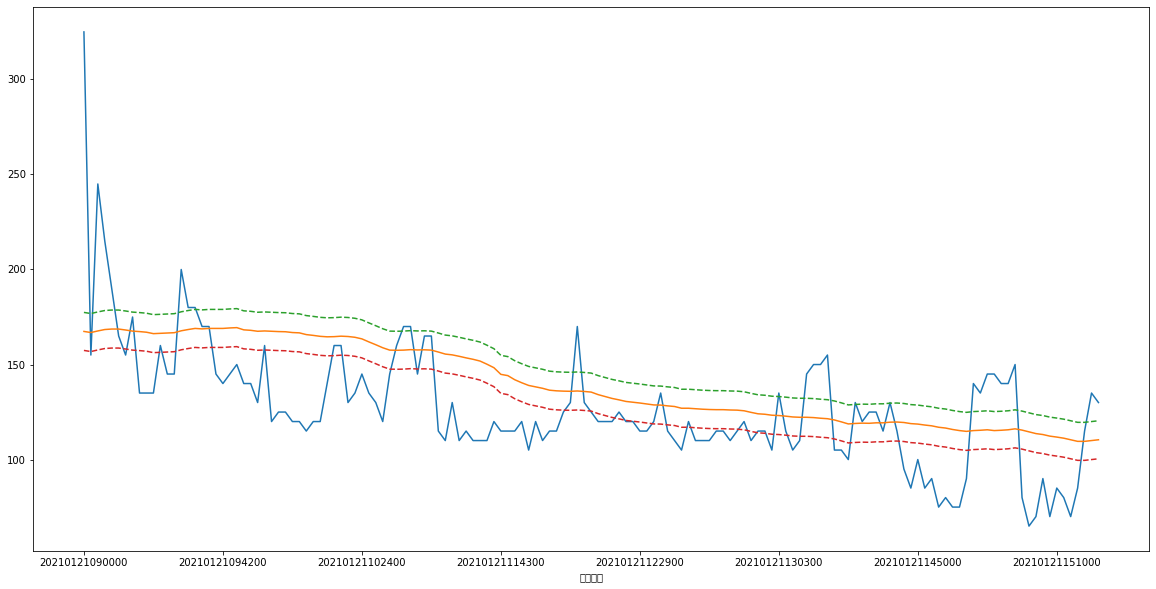

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

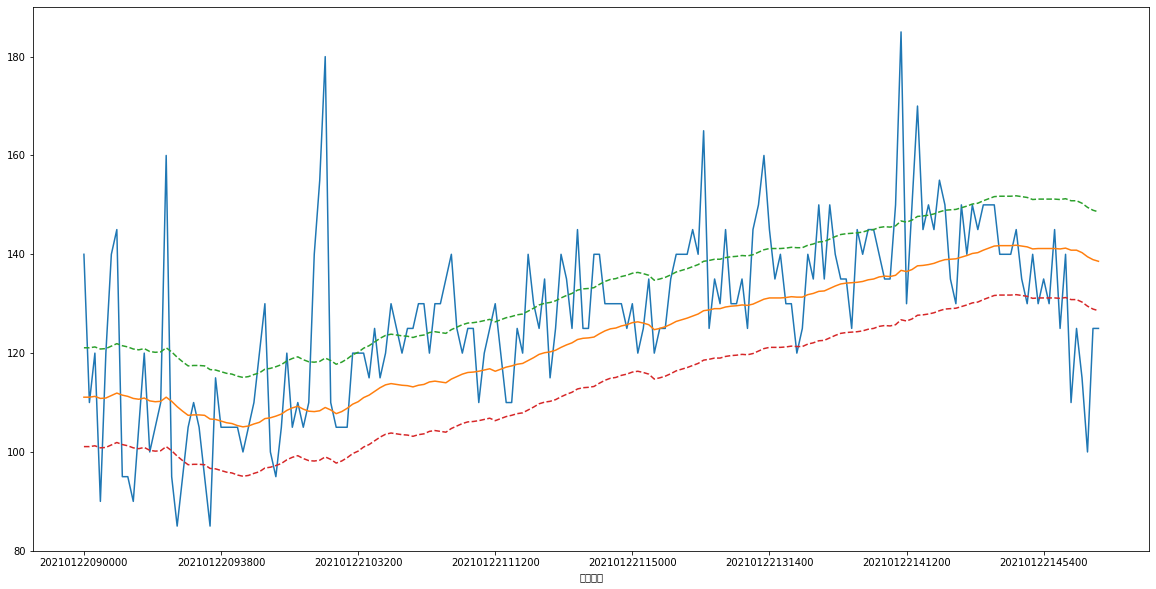

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

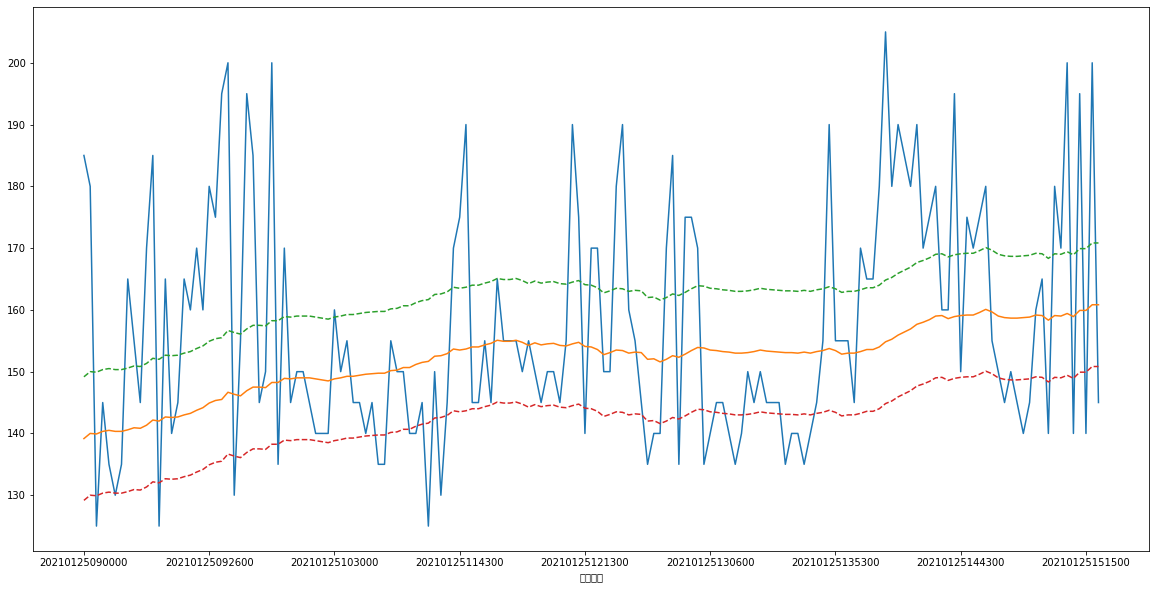

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

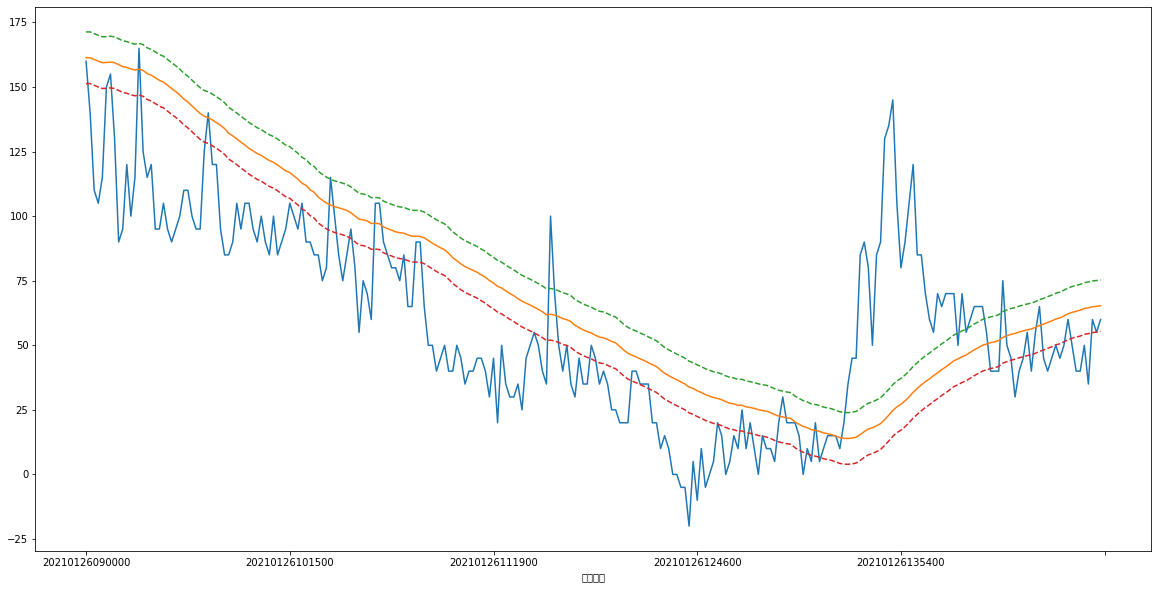

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

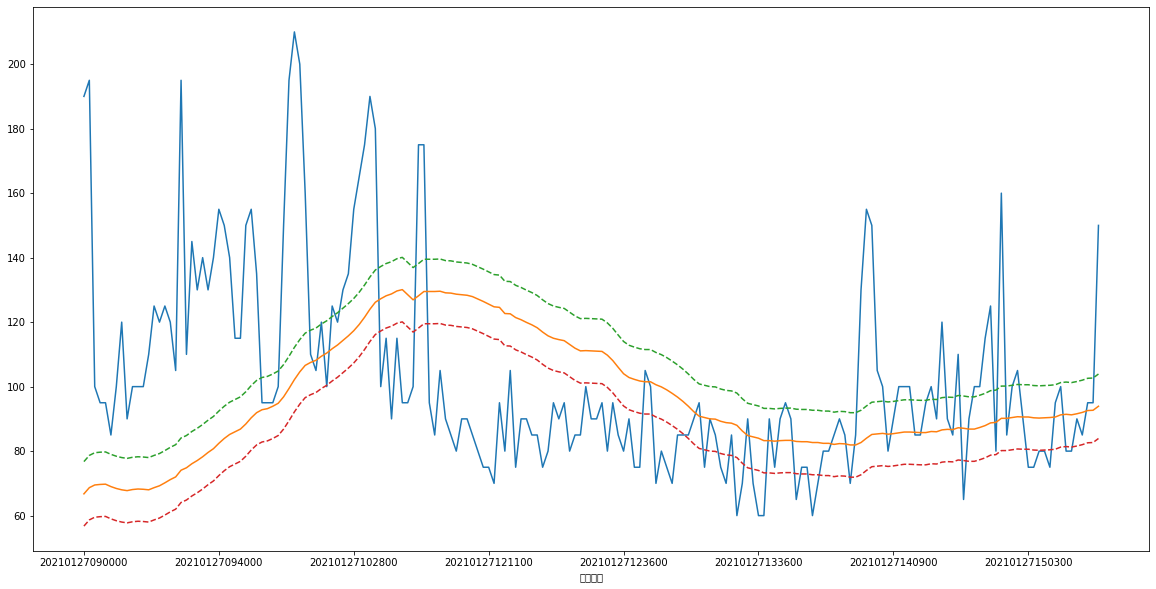

In [ ]:
for date in calender[-20:]:
    plt.rcParams["figure.figsize"] = (20, 10)
    df[date]['spread'].plot()
    df[date]['ma60_spread'].plot()
    temp_high = df[date]['ma60_spread'] +10
    temp_low = df[date]['ma60_spread']-10
    temp_high.plot(linestyle='--')
    temp_low.plot(linestyle='--')
    # df[date]['kodex200'].plot()
    # df[date]['kodex_active'].plot()
    # plt.axhline((0.0003), color='red', linestyle='--')
    # plt.axhline((-0.0003), color='red', linestyle='--')
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

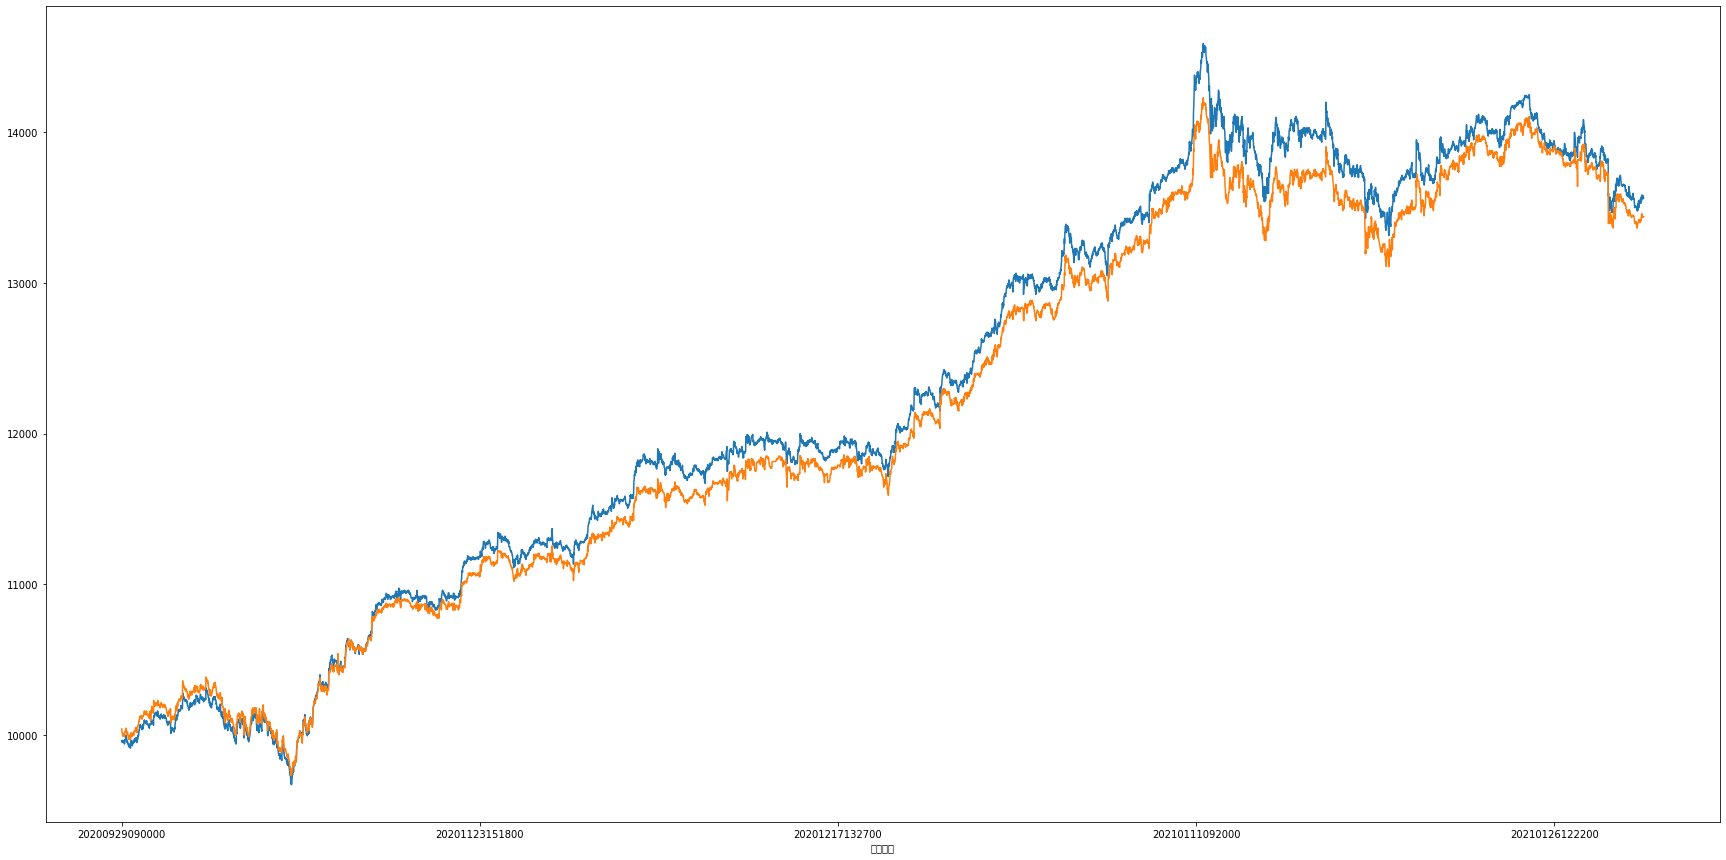

In [ ]:
plt.rcParams["figure.figsize"] = (30, 15)
# temp['kodex200_cumret'].plot()
# temp['kodex_active_cumret'].plot()
# temp['tiger_active_cumret'].plot()
temp['kodex200'].plot()
temp['kodex_active'].plot()
# temp['ma30'].plot()

# 4. 스프레드 확인

In [8]:
cd drive/My Drive/algorithmtrading/pair_trading/bidask/

/content/drive/My Drive/algorithmtrading/pair_trading/bidask


In [9]:
now = '20210128'

kodex_active_bidask = pd.read_pickle('KODEX 혁신기술테마액티브_'+now)
kodex200_bidask = pd.read_pickle('KODEX 200TR_'+now)

kodex_active_bidask = kodex_active_bidask.reset_index()[['bid','ask']]
kodex200_bidask = kodex200_bidask.reset_index()[['bid','ask']]
bidask = pd.concat([kodex_active_bidask,kodex200_bidask],axis=1)
# bidask =  pd.merge(left = kodex_active_bidask , right = kodex200_bidask, how = "inner", on = "time")
bidask.columns = ['kodex_active_bid','kodex_active_ask','kodex200_bid','kodex200_ask']
bidask['kodex_active_ask'] = bidask['kodex_active_ask'] 
bidask['kodex_active_bid'] = bidask['kodex_active_bid'] 
kodex_active_ask = bidask['kodex_active_ask']
kodex_active_bid = bidask['kodex_active_bid']
kodex200_ask = bidask['kodex200_ask']
kodex200_bid = bidask['kodex200_bid']
bidask

,kodex_active_bid,kodex_active_ask,kodex200_bid,kodex200_ask
0,13500,13450,13610,13580
1,13500,13450,13605,13580
2,13500,13455,13600,13580
3,13500,13455,13600,13570
4,13500,13455,13605,13570
...,...,...,...,...
6516,13415,13405,13555,13510
6517,13415,13405,13555,13510
6518,13415,13405,13555,13510
6519,13415,13405,13555,13510


## - bidask 스프레드

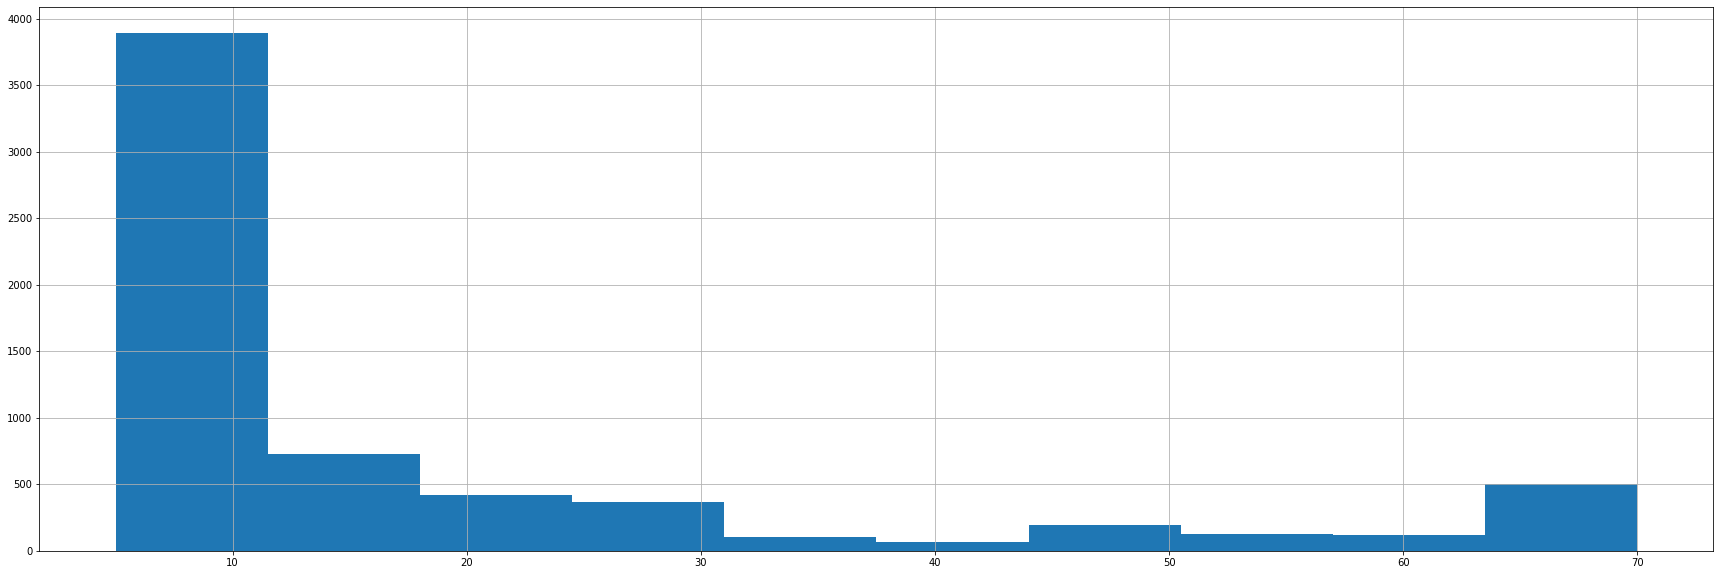

In [10]:
plt.rcParams["figure.figsize"] = (30, 10)
bidask_spread = kodex_active_bid-kodex_active_ask
bidask_spread.hist()

# kodex200_ask_kodex_active_bid spread freaquency    (청산포지션)

-135    949
-140    881
-130    853
-145    615
-125    610
-150    433
-120    302
-175    263
-180    256
-155    240
-185    221
-165    178
-160    161
-190    143
-170    132
-195     98
-115     62
-200     43
-110     40
-205     30
-215      6
-105      5
dtype: int64


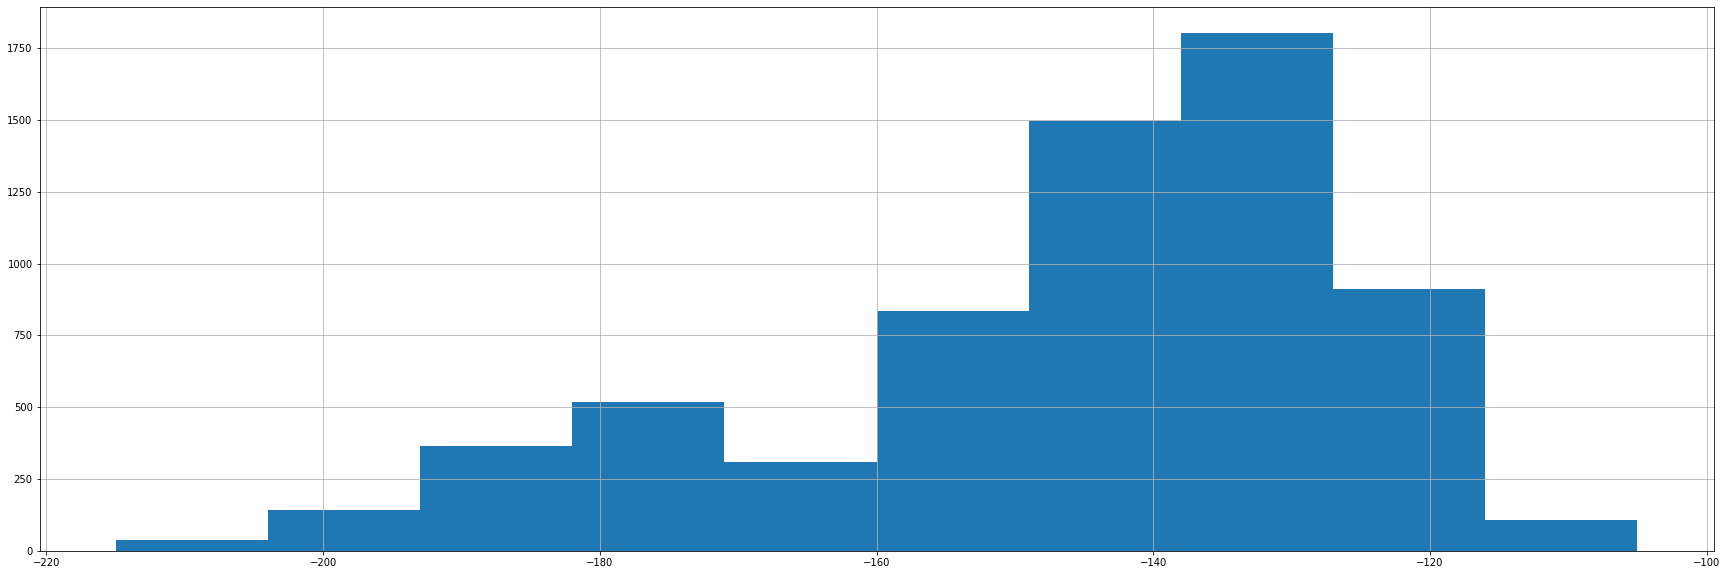

In [11]:
long = kodex_active_ask - kodex200_bid
long.hist()
finish = long.value_counts() 
print(finish[:30])

# kodex_active_ask_kodex200_bid spread freaquency (포지션시작)

115    1068
110     907
120     846
105     784
100     744
95      440
90      394
125     362
85      187
80      181
70      137
75      135
130     135
150      49
65       45
145      34
140      31
135      22
60        8
50        5
155       4
45        3
dtype: int64


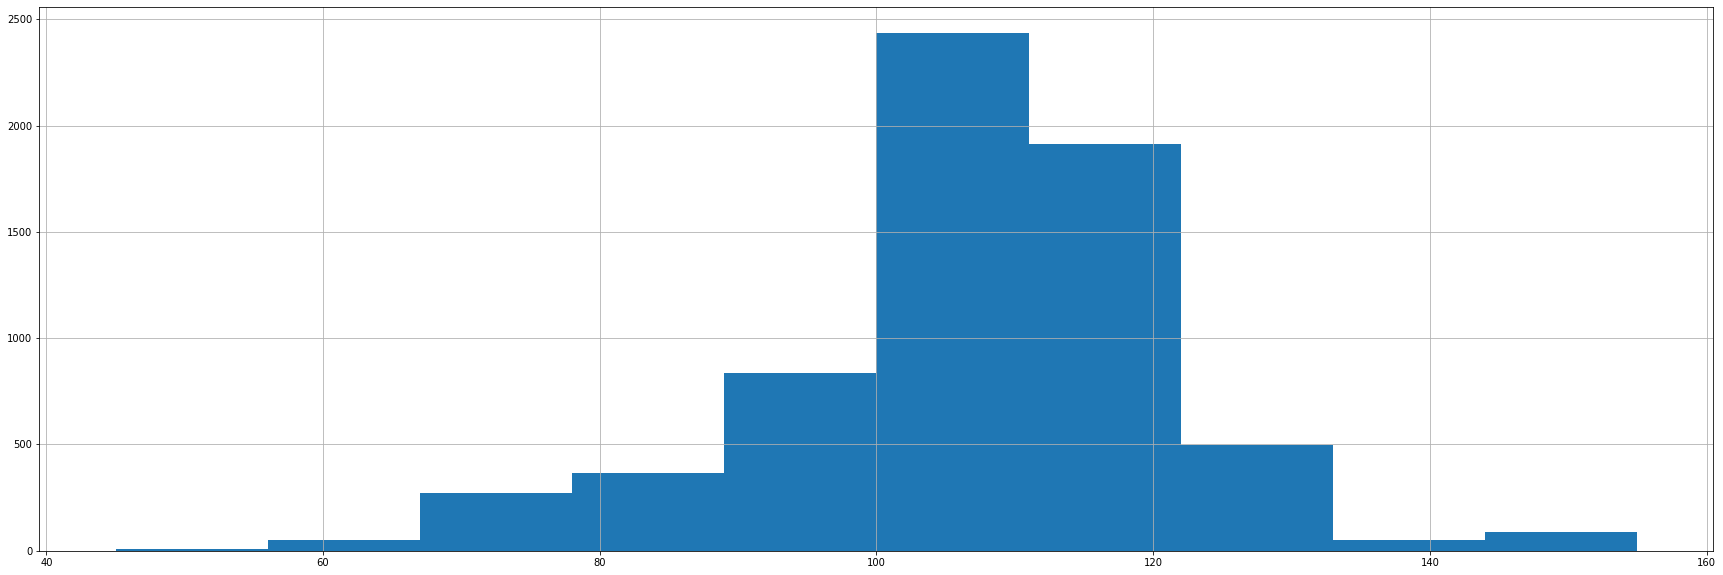

In [12]:
short = kodex200_ask - kodex_active_bid
short.hist()
start = short.value_counts() 
print(start[:30])

In [ ]:
kodex_active_bidask.plot()

# 시뮬레이션

In [25]:
profit = 0
profits = {}

kodex200 = 100
kodex_active = 100

init = 30

lev = 30

spread_start = list(map(int,start.index))
spread_finish = list(map(int,finish.index))


for j in spread_start[:30]:
    for k in spread_finish[:30]:
        if j + k <= 0:
            continue
        profit = 0
        t = 0
        check = None
        kodex200 = 30
        kodex_active = 30
        for i in range(len(bidask)):
            if bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= j and init <=kodex_active<= init*2-lev:
                kodex200 -= lev
                kodex_active += lev
                profit += bidask['kodex200_ask'].iloc[i]*lev - bidask['kodex_active_bid'].iloc[i]*lev
                print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'short'
            if bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= k and kodex_active > init and check == 'short':
                profit += bidask['kodex_active_ask'].iloc[i]*(kodex_active - init) - bidask['kodex200_bid'].iloc[i]*(kodex_active-init)
                kodex_active = init
                kodex200 = init
                print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)       
                t += 2


            if bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= k and init<= kodex200<=init*2-lev:
                kodex200 += lev
                kodex_active -= lev
                profit += bidask['kodex_active_ask'].iloc[i]*lev - bidask['kodex200_bid'].iloc[i]*lev
                print('longstart',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'long'
            if bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= j and kodex200 > init and check == 'long':
                profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['kodex_active_bid'].iloc[i]*(kodex200-init)
                kodex_active = init
                kodex200 = init
                print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)       
                t += 2
        
        if check == 'short':
            profit += bidask['kodex_active_ask'].iloc[-1]*(kodex_active - init) - bidask['kodex200_bid'].iloc[-1]*(kodex_active-init)
            print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit) 
        if check == 'long':
            profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['kodex_active_bid'].iloc[i]*(kodex200-init)
            print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)     

        profits[(j,k,t)] = profit - t*6
        print('-------------------------------------------------------------------------------------------------------------------')

profits = sorted(profits.items(), key=lambda x: x[1], reverse=True)
profits[:20]

longstart 139 번째거래 /    ask: 13445   bid: 13555   profit: -3300
longfinish 428 번째거래 /    ask: 13615   bid: 13500   profit: 150
shortstart 429 번째거래 /    ask: 13615   bid: 13500   profit: 3600
shortfinish 2385 번째거래 /    ask: 13480   bid: 13590   profit: 300
longstart 2385 번째거래 /    ask: 13480   bid: 13590   profit: -3000
longfinish 2430 번째거래 /    ask: 13585   bid: 13465   profit: 600
shortstart 2431 번째거래 /    ask: 13585   bid: 13465   profit: 4200
shortfinish 3223 번째거래 /    ask: 13470   bid: 13580   profit: 900
longstart 3223 번째거래 /    ask: 13470   bid: 13580   profit: -2400
longfinish 3299 번째거래 /    ask: 13570   bid: 13455   profit: 1050
shortstart 3300 번째거래 /    ask: 13570   bid: 13455   profit: 4500
shortfinish 4146 번째거래 /    ask: 13435   bid: 13545   profit: 1200
longstart 4146 번째거래 /    ask: 13435   bid: 13545   profit: -2100
longfinish 4151 번째거래 /    ask: 13540   bid: 13420   profit: 1500
shortstart 4152 번째거래 /    ask: 13540   bid: 13420   profit: 5100
shortfinish 4199 번째거래 /    as

[((130, -110, 36), 5484),
 ((125, -110, 44), 5136),
 ((125, -115, 60), 4890),
 ((130, -120, 60), 4740),
 ((130, -115, 36), 4434),
 ((125, -120, 100), 4350),
 ((135, -110, 26), 4044),
 ((130, -125, 88), 3972),
 ((120, -115, 102), 3888),
 ((135, -120, 38), 3822),
 ((145, -110, 18), 3492),
 ((135, -115, 26), 2994),
 ((140, -110, 18), 2892),
 ((140, -120, 26), 2844),
 ((145, -115, 18), 2742),
 ((135, -125, 46), 2574),
 ((135, -105, 14), 2466),
 ((120, -110, 46), 2424),
 ((140, -115, 18), 2142),
 ((155, -110, 10), 2040)]

# 이동평균 스프레드 시물레이션

In [17]:
profit = 0
profits = {}

kodex200 = 100
kodex_active = 100

init = 100

lev = 1

profit = 0
t = 0
check = None

dfj = []
dfk = []
tempk = 0
tempj = 0
for i in range(len(bidask)):
    short = int(bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i])
    long =int(bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i])

    dfj.append(short)
    dfk.append(long)   

    if i <= 200:
        continue
    
    del dfj[0]
    del dfk[0]

    j = pd.Series(dfj)
    k = pd.Series(dfk)
    j = j.rolling(window=200).mean()
    k = k.rolling(window=200).mean()

    if bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= k.iloc[-1]+10 and init <=kodex_active<= init*2-lev:
        kodex200 -= lev
        kodex_active += lev
        profit += bidask['kodex200_ask'].iloc[i]*lev - bidask['kodex_active_bid'].iloc[i]*lev
        print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)
        print(kodex200,kodex_active)
        t += 2
        check = 'short'
        tempk = bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i]
    if bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= -tempk+10 and kodex_active > init and check == 'short':
        profit += bidask['kodex_active_ask'].iloc[i]*(kodex_active - init) - bidask['kodex200_bid'].iloc[i]*(kodex_active-init)
        kodex_active = init
        kodex200 = init
        print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)       
        t += 2


    if bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= j.iloc[-1]+10 and init<= kodex200<=init*2-lev:
        kodex200 += lev
        kodex_active -= lev
        profit += bidask['kodex_active_ask'].iloc[i]*lev - bidask['kodex200_bid'].iloc[i]*lev
        print('longstart',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)
        print(kodex200,kodex_active,j.iloc[-1])
        t += 2
        check = 'long'
        tempj = bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i]
        continue
    if bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= -tempj+10 and kodex200 > init and check == 'long':
        profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['kodex_active_bid'].iloc[i]*(kodex200-init)
        kodex_active = init
        kodex200 = init
        print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)       
        t += 2

if check == 'short':
    profit += bidask['kodex_active_ask'].iloc[-1]*(kodex_active - init) - bidask['kodex200_bid'].iloc[-1]*(kodex_active-init)
    print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit) 
    print(kodex200,kodex_active)
if check == 'long':
    profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['kodex_active_bid'].iloc[i]*(kodex200-init)
    print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)    
    print(kodex200,kodex_active)
print(profit)

shortstart 225 번째거래 /    ask: 13575   bid: 13480   profit: 95
99 101
shortstart 226 번째거래 /    ask: 13575   bid: 13480   profit: 190
98 102
shortstart 227 번째거래 /    ask: 13575   bid: 13480   profit: 285
97 103
shortstart 228 번째거래 /    ask: 13575   bid: 13480   profit: 380
96 104
shortstart 229 번째거래 /    ask: 13575   bid: 13480   profit: 475
95 105
shortstart 230 번째거래 /    ask: 13575   bid: 13480   profit: 570
94 106
shortstart 231 번째거래 /    ask: 13575   bid: 13480   profit: 665
93 107
shortstart 232 번째거래 /    ask: 13575   bid: 13485   profit: 755
92 108
shortstart 233 번째거래 /    ask: 13575   bid: 13485   profit: 845
91 109
shortstart 234 번째거래 /    ask: 13575   bid: 13485   profit: 935
90 110
shortstart 235 번째거래 /    ask: 13575   bid: 13485   profit: 1025
89 111
shortstart 236 번째거래 /    ask: 13575   bid: 13485   profit: 1115
88 112
shortstart 237 번째거래 /    ask: 13575   bid: 13485   profit: 1205
87 113
shortstart 238 번째거래 /    ask: 13575   bid: 13485   profit: 1295
86 114
shortstart 315 번째

In [ ]:
-22300+

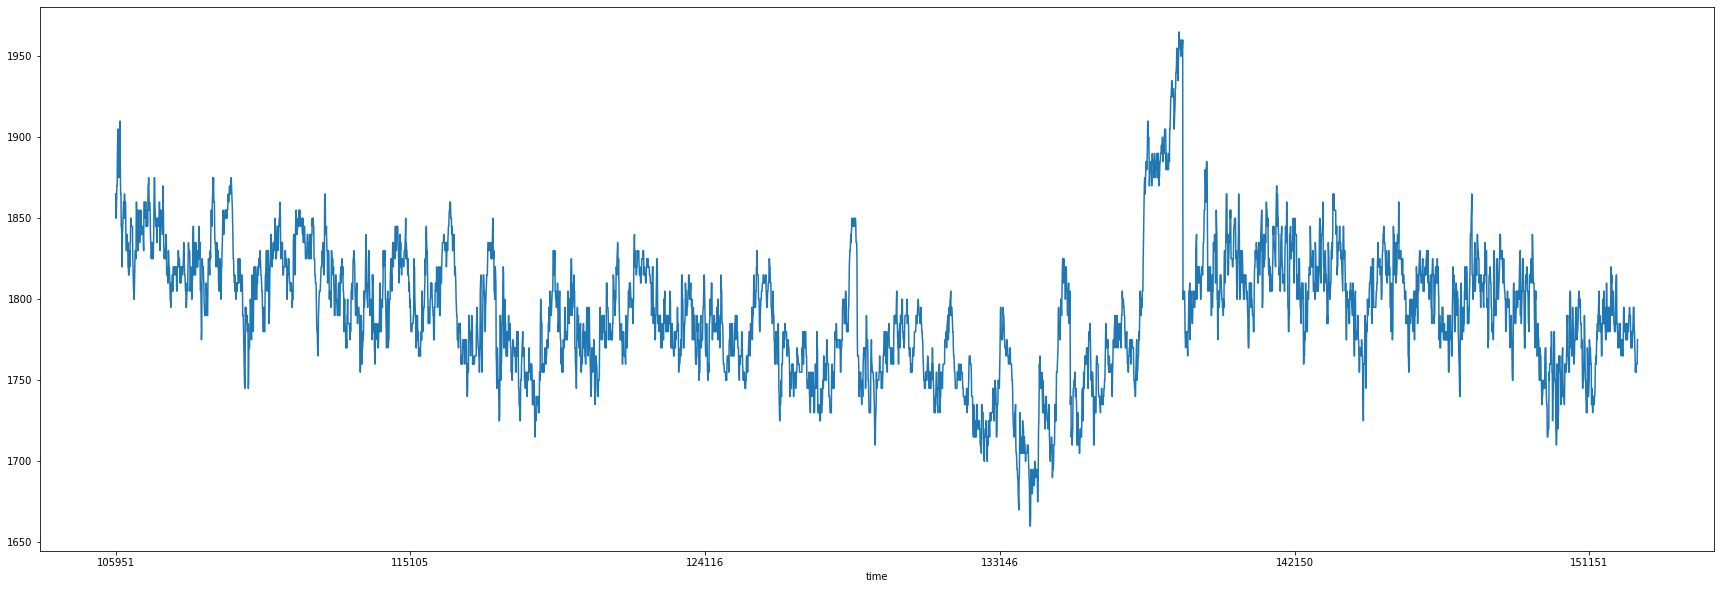

In [ ]:
short.plot()
# (-long.rolling(window = 200).mean()).plot()
# (-long.rolling(window = 200).mean()-100).plot()
# (-long).plot()

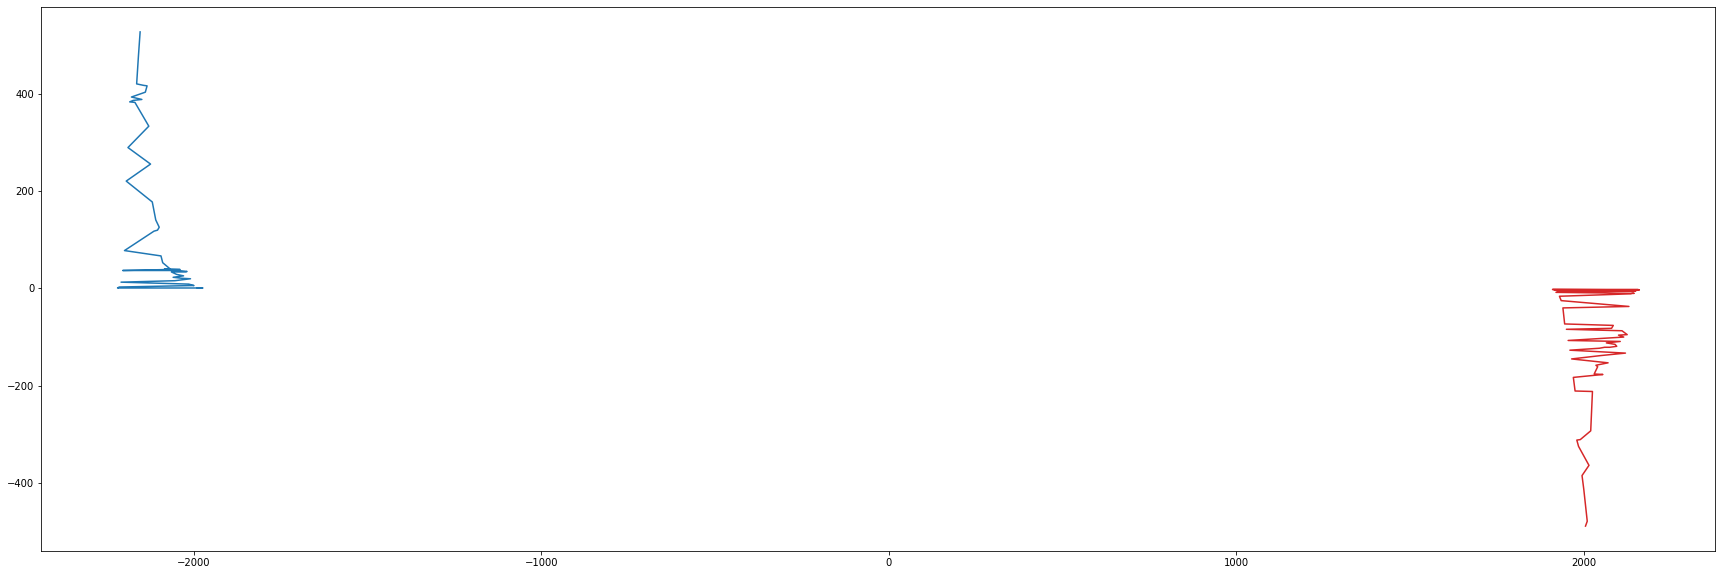

In [ ]:
finish.plot()
(-start.rolling(window = 200).mean()).plot()
(-start.rolling(window = 200).mean()-50).plot()
(-start).plot()